In [7]:
import geopandas as gpd
import pandas as pd

In [8]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/JORDANOPOLIS EIXOS VIA.dxf', encoding='ANSI_1252')

In [9]:
bairro = 'JORDANOPOLIS'

In [10]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [11]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [12]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,RUA RIO DE JANEIRO - 05_01_2021 - JOR87,None,AcDbEntity:AcDb2dPolyline,None,6F,None,"LINESTRING Z (339528.921 7379610.209 0.000, 33..."
1,RUA JOÃO BATISTA DE AZEVEDO MARQUES - 06_01_2...,None,AcDbEntity:AcDb2dPolyline,None,76,None,"LINESTRING Z (340205.132 7379704.102 0.000, 34..."
2,RUA JOÃO BATISTA DE AZEVEDO MARQUES - 06_01_2...,None,AcDbEntity:AcDb2dPolyline,None,7A,None,"LINESTRING Z (340149.991 7379857.938 0.000, 34..."
3,RUA MARTIM SILVEIRA - 05_01_2021 - JOR39,None,AcDbEntity:AcDb2dPolyline,None,83,None,"LINESTRING Z (339183.391 7380515.296 0.000, 33..."
4,RUA MANOER - 05_01_2021 - JOR109,None,AcDbEntity:AcDb2dPolyline,None,89,None,"LINESTRING Z (339709.223 7380859.764 0.000, 33..."
...,...,...,...,...,...,...,...
134,RUA ADOLFO MONTEIRO - 05_01_2021 - JOR18,None,AcDbEntity:AcDb2dPolyline,None,311,None,"LINESTRING Z (338826.162 7380632.174 0.000, 33..."
135,RUA CARLOS RIZZINI - 05_01_2021 - JOR17,None,AcDbEntity:AcDb2dPolyline,None,31C,None,"LINESTRING Z (338904.211 7380723.301 0.000, 33..."
136,RUA MARIO JÃLIO RODRIGUES - 05_01_2021 - JOR19,None,AcDbEntity:AcDb2dPolyline,None,321,None,"LINESTRING Z (338950.604 7380710.573 0.000, 33..."
137,RUA FREI DAMIÃO - 05_01_2021 - JOR104,None,AcDbEntity:AcDb2dPolyline,None,326,None,"LINESTRING Z (339148.500 7381162.873 0.000, 33..."


In [13]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [14]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

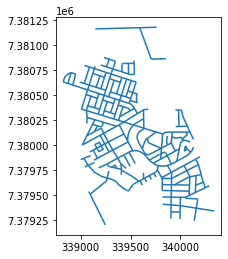

In [15]:
gdf_dxf.plot()

In [16]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('!', '1')

In [17]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [18]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [19]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('JOR[0-9]{1,4}')

In [20]:
gdf_dxf.DJI

0       [JOR87]
1      [JOR112]
2      [JOR112]
3       [JOR39]
4      [JOR109]
         ...   
134     [JOR18]
135     [JOR17]
136     [JOR19]
137    [JOR104]
138     [JOR84]
Name: DJI, Length: 139, dtype: object

In [21]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [22]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [23]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [24]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer'].to_list()

['ETAPA ASFALTICO  02', ' PRAÇA MARIA TUDOR']

In [25]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(JOR[0-9]{1,4})', expand=True)

,0,1,2,3,4,5,6,7,8,9
0,RUA RIO DE JANEIRO -,05_01_20,None,21 -,None,JOR87,,None,None,None
1,RUA JOÃO BATISTA DE AZEVEDO MARQUES -,06_01_20,None,21 -,None,JOR112,,None,None,None
2,RUA JOÃO BATISTA DE AZEVEDO MARQUES -,06_01_20,None,21 -,None,JOR112,,None,None,None
3,RUA MARTIM SILVEIRA -,05_01_20,None,21 -,None,JOR39,,None,None,None
4,RUA MANOER -,05_01_20,None,21 -,None,JOR109,,None,None,None
...,...,...,...,...,...,...,...,...,...,...
134,RUA ADOLFO MONTEIRO -,05_01_20,None,21 -,None,JOR18,,None,None,None
135,RUA CARLOS RIZZINI -,05_01_20,None,21 -,None,JOR17,,None,None,None
136,RUA MARIO JÚLIO RODRIGUES -,05_01_20,None,21 -,None,JOR19,,None,None,None
137,RUA FREI DAMIÃO -,05_01_20,None,21 -,None,JOR104,,None,None,None


In [26]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(JOR[0-9]{1,4})', expand=True)[3].unique().tolist()

['21 - ', None]

In [27]:
etapas = {
     '21 - ':'etapa_00', 
    '21 -':'etapa_00',
    '':'etapa_00',
    '21- ':'etapa_00'
}

In [28]:
len(etapas)

4

In [29]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(JOR[0-9]{1,4})', expand=True)[3].map(etapas)

0      etapa_00
1      etapa_00
2      etapa_00
3      etapa_00
4      etapa_00
         ...   
134    etapa_00
135    etapa_00
136    etapa_00
137    etapa_00
138    etapa_00
Name: 3, Length: 139, dtype: object

In [30]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(JOR[0-9]{1,4})', expand=True)[3].map(etapas)

In [31]:
gdf_dxf.loc[:, 'etapa']

0      etapa_00
1      etapa_00
2      etapa_00
3      etapa_00
4      etapa_00
         ...   
134    etapa_00
135    etapa_00
136    etapa_00
137    etapa_00
138    etapa_00
Name: etapa, Length: 139, dtype: object

In [32]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,RUA RIO DE JANEIRO - 05_01_2021 - JOR87,None,AcDbEntity:AcDb2dPolyline,None,6F,None,"LINESTRING Z (339528.921 7379610.209 0.000, 33...","[RUA RIO DE JANEIRO, 05_01_2021, JOR87]",[JOR87],05_01_20,RUA RIO DE JANEIRO,etapa_00
1,RUA JOÃO BATISTA DE AZEVEDO MARQUES - 06_01_20...,None,AcDbEntity:AcDb2dPolyline,None,76,None,"LINESTRING Z (340205.132 7379704.102 0.000, 34...","[RUA JOÃO BATISTA DE AZEVEDO MARQUES, 06_01_20...",[JOR112],06_01_20,RUA JOÃO BATISTA DE AZEVEDO MARQUES,etapa_00
2,RUA JOÃO BATISTA DE AZEVEDO MARQUES - 06_01_20...,None,AcDbEntity:AcDb2dPolyline,None,7A,None,"LINESTRING Z (340149.991 7379857.938 0.000, 34...","[RUA JOÃO BATISTA DE AZEVEDO MARQUES, 06_01_20...",[JOR112],06_01_20,RUA JOÃO BATISTA DE AZEVEDO MARQUES,etapa_00
3,RUA MARTIM SILVEIRA - 05_01_2021 - JOR39,None,AcDbEntity:AcDb2dPolyline,None,83,None,"LINESTRING Z (339183.391 7380515.296 0.000, 33...","[RUA MARTIM SILVEIRA, 05_01_2021, JOR39]",[JOR39],05_01_20,RUA MARTIM SILVEIRA,etapa_00
4,RUA MANOER - 05_01_2021 - JOR109,None,AcDbEntity:AcDb2dPolyline,None,89,None,"LINESTRING Z (339709.223 7380859.764 0.000, 33...","[RUA MANOER, 05_01_2021, JOR109]",[JOR109],05_01_20,RUA MANOER,etapa_00
...,...,...,...,...,...,...,...,...,...,...,...,...
134,RUA ADOLFO MONTEIRO - 05_01_2021 - JOR18,None,AcDbEntity:AcDb2dPolyline,None,311,None,"LINESTRING Z (338826.162 7380632.174 0.000, 33...","[RUA ADOLFO MONTEIRO, 05_01_2021, JOR18]",[JOR18],05_01_20,RUA ADOLFO MONTEIRO,etapa_00
135,RUA CARLOS RIZZINI - 05_01_2021 - JOR17,None,AcDbEntity:AcDb2dPolyline,None,31C,None,"LINESTRING Z (338904.211 7380723.301 0.000, 33...","[RUA CARLOS RIZZINI, 05_01_2021, JOR17]",[JOR17],05_01_20,RUA CARLOS RIZZINI,etapa_00
136,RUA MARIO JÚLIO RODRIGUES - 05_01_2021 - JOR19,None,AcDbEntity:AcDb2dPolyline,None,321,None,"LINESTRING Z (338950.604 7380710.573 0.000, 33...","[RUA MARIO JÚLIO RODRIGUES, 05_01_2021, JOR19]",[JOR19],05_01_20,RUA MARIO JÚLIO RODRIGUES,etapa_00
137,RUA FREI DAMIÃO - 05_01_2021 - JOR104,None,AcDbEntity:AcDb2dPolyline,None,326,None,"LINESTRING Z (339148.500 7381162.873 0.000, 33...","[RUA FREI DAMIÃO, 05_01_2021, JOR104]",[JOR104],05_01_20,RUA FREI DAMIÃO,etapa_00


In [33]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [34]:
pd_videos

,Video_0,Video_1
0,JOR87.MOV,None
1,JOR112.MOV,None
2,JOR112.MOV,None
3,JOR39.MOV,None
4,JOR109.MOV,None
...,...,...
134,JOR18.MOV,None
135,JOR17.MOV,None
136,JOR19.MOV,None
137,JOR104.MOV,None


In [35]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [36]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0', 'Video_1'],
      dtype='object')

In [37]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [38]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [39]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [40]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [41]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf.etapa + gdf_dxf[c]

In [42]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [43]:
gdf_dxf.crs = 'epsg:31983'

In [44]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path
0,PRAÇA MARIA TUDOR,MULTILINESTRING Z ((340102.543 7379929.180 0.0...,None,AcDbEntity:AcDb2dPolyline,None,250,None,[ PRAÇA MARIA TUDOR],[],None,PRAÇA MARIA TUDOR,,None,None,None,None
1,AVENIDA PADRE ANCHIETA - 05_01_2021 - JOR84,"LINESTRING Z (339180.479 7379773.463 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,32B,None,"[AVENIDA PADRE ANCHIETA, 05_01_2021, JOR84]",[JOR84],05_01_20/,AVENIDA PADRE ANCHIETA,etapa_00/,JOR84.MOV,None,videos/jordanopolis/etapa_00/JOR84.MOV,None
2,AVENIDA SÃO PAULO - 05_01_2021 - JOR60,"LINESTRING Z (339016.556 7380000.177 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,2EE,None,"[AVENIDA SÃO PAULO, 05_01_2021, JOR60]",[JOR60],05_01_20/,AVENIDA SÃO PAULO,etapa_00/,JOR60.MOV,None,videos/jordanopolis/etapa_00/JOR60.MOV,None
3,ETAPA ASFALTICO 02,"LINESTRING Z (340048.836 7379476.226 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,Continuous,E9,None,[ETAPA ASFALTICO 02],[],None,ETAPA ASFALTICO 02,,None,None,None,None
4,PRAÇA ATÍLIO HILÁRIO SUSTER - 05_01_2021 - JOR103,"LINESTRING Z (339310.346 7379779.102 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,20E,None,"[PRAÇA ATÍLIO HILÁRIO SUSTER, 05_01_2021, JOR103]",[JOR103],05_01_20/,PRAÇA ATÍLIO HILÁRIO SUSTER,etapa_00/,JOR103.MOV,None,videos/jordanopolis/etapa_00/JOR103.MOV,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,RUA WALDERMAR MARTINS FERREIRA - 06_01_2021 - ...,"LINESTRING Z (339869.090 7379795.842 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,305,None,"[RUA WALDERMAR MARTINS FERREIRA, 06_01_2021, J...",[JOR116],06_01_20/,RUA WALDERMAR MARTINS FERREIRA,etapa_00/,JOR116.MOV,None,videos/jordanopolis/etapa_00/JOR116.MOV,None
111,RUA WALTER DARÉ - 05_01_2021 - JOR96,MULTILINESTRING Z ((339290.595 7379783.709 0.0...,None,AcDbEntity:AcDbLine,None,214,None,"[RUA WALTER DARÉ, 05_01_2021, JOR96]",[JOR96],05_01_20/,RUA WALTER DARÉ,etapa_00/,JOR96.MOV,None,videos/jordanopolis/etapa_00/JOR96.MOV,None
112,RUA ÉDSON CARNEIRO - 05_01_2021 - JOR24,"LINESTRING Z (339473.671 7380542.991 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,107,None,"[RUA ÉDSON CARNEIRO, 05_01_2021, JOR24]",[JOR24],05_01_20/,RUA ÉDSON CARNEIRO,etapa_00/,JOR24.MOV,None,videos/jordanopolis/etapa_00/JOR24.MOV,None
113,TRAVESSIA PADRE ANCHIETA - 05_01_2021 - JOR100,"LINESTRING Z (339484.386 7379928.622 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,1FB,None,"[TRAVESSIA PADRE ANCHIETA, 05_01_2021, JOR100]",[JOR100],05_01_20/,TRAVESSIA PADRE ANCHIETA,etapa_00/,JOR100.MOV,None,videos/jordanopolis/etapa_00/JOR100.MOV,None


In [45]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path
0,MULTILINESTRING Z ((340102.543 7379929.180 0.0...,None,PRAÇA MARIA TUDOR,,None,None,None,None
1,"LINESTRING Z (339180.479 7379773.463 0.000, 33...",05_01_20/,AVENIDA PADRE ANCHIETA,etapa_00/,JOR84.MOV,None,videos/jordanopolis/etapa_00/JOR84.MOV,None
2,"LINESTRING Z (339016.556 7380000.177 0.000, 33...",05_01_20/,AVENIDA SÃO PAULO,etapa_00/,JOR60.MOV,None,videos/jordanopolis/etapa_00/JOR60.MOV,None
3,"LINESTRING Z (340048.836 7379476.226 0.000, 34...",None,ETAPA ASFALTICO 02,,None,None,None,None
4,"LINESTRING Z (339310.346 7379779.102 0.000, 33...",05_01_20/,PRAÇA ATÍLIO HILÁRIO SUSTER,etapa_00/,JOR103.MOV,None,videos/jordanopolis/etapa_00/JOR103.MOV,None
...,...,...,...,...,...,...,...,...
110,"LINESTRING Z (339869.090 7379795.842 0.000, 33...",06_01_20/,RUA WALDERMAR MARTINS FERREIRA,etapa_00/,JOR116.MOV,None,videos/jordanopolis/etapa_00/JOR116.MOV,None
111,MULTILINESTRING Z ((339290.595 7379783.709 0.0...,05_01_20/,RUA WALTER DARÉ,etapa_00/,JOR96.MOV,None,videos/jordanopolis/etapa_00/JOR96.MOV,None
112,"LINESTRING Z (339473.671 7380542.991 0.000, 33...",05_01_20/,RUA ÉDSON CARNEIRO,etapa_00/,JOR24.MOV,None,videos/jordanopolis/etapa_00/JOR24.MOV,None
113,"LINESTRING Z (339484.386 7379928.622 0.000, 33...",05_01_20/,TRAVESSIA PADRE ANCHIETA,etapa_00/,JOR100.MOV,None,videos/jordanopolis/etapa_00/JOR100.MOV,None


In [46]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.gpkg', driver='GPKG')

In [47]:
gdf_dxf.to_crs('EPSG:4326').drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.geojson', driver='GeoJSON')

In [48]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
data_voo          object
logradouro        object
etapa             object
Video_0           object
Video_1           object
Video_0_path      object
Video_1_path      object
dtype: object

In [49]:
gdf_dxf.Video_0.isna().value_counts()

False    113
True       2
Name: Video_0, dtype: int64